Assignment 2 (due on 11/8)

学生：刘骐鸣 (12332334)

批改人：Zhao Shuhui

得分：42/50

=========================================
# 1 Significant Earthquakes
24/25  
1.1 计算每个国家从BC2150开始的地震死亡人数，并输出最多的10个国家，附上相应人数 5/5  
1.2 计算每年全世界震级大于6.0的地震数量，并画出时间序列，在报告中陈述是否有趋势以及理由——时间序列绘画失误，注意数量为0的年份 9/10  
1.3 创建CountEq_LargestEq方法，要求方法返回 1）给定国家从BC2150开始的地震数量；2）该国家最严重地震的发生日期。对数据集中的所有国家使用该方法，将得到的结果按地震数量从大到小排序——日期（而不是年份）格式需完善 9/10

## 1.1

In [1]:

# import pandas 
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
earthquake_data=pd.read_csv('C:\Program1\jupyter_notebook\ese5023\earthquakes.tsv',sep='\t')
earthquake_data

,Search Parameters,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,5877.0,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,NaN,10709.0,2023.0,10.0,8.0,20.0,25.0,23.0,5891.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,NaN,10710.0,2023.0,10.0,11.0,0.0,41.0,56.0,NaN,NaN,...,NaN,NaN,164.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN
6400,NaN,10712.0,2023.0,10.0,15.0,3.0,36.0,0.0,NaN,NaN,...,NaN,NaN,153.0,3.0,NaN,2.0,NaN,2.0,NaN,NaN
6401,NaN,10716.0,2023.0,11.0,3.0,18.0,2.0,54.0,NaN,NaN,...,NaN,NaN,364.0,3.0,NaN,3.0,26557.0,4.0,35455.0,4.0


In [2]:
# 过滤自公元前2150年以来的数据
earthquake_data = earthquake_data[earthquake_data['Year'] >= -2150]
# 根据国家分组并计算每个国家的总死亡人数
deaths_by_country = earthquake_data.groupby('Country')['Total Deaths'].sum()

# 按降序排序并打印前十个国家及其总死亡人数
top_10_countries = deaths_by_country.sort_values(ascending=False).head(10)
print(top_10_countries)

Country
CHINA         2041929.0
TURKEY         995648.0
IRAN           758650.0
SYRIA          437700.0
ITALY          422679.0
JAPAN          356083.0
HAITI          323776.0
AZERBAIJAN     310119.0
INDONESIA      282819.0
ARMENIA        189000.0
Name: Total Deaths, dtype: float64


## 1.2

Year
-2150.0     1
-2000.0     1
-1250.0     1
-1050.0     1
-479.0      1
           ..
 2019.0    27
 2020.0    15
 2021.0    23
 2022.0    20
 2023.0    22
Name: Mag, Length: 536, dtype: int64


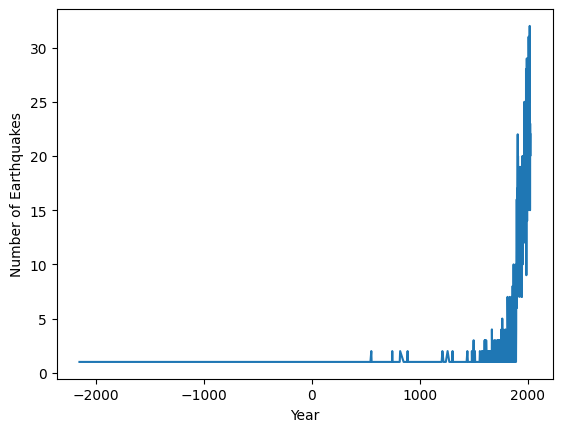

In [3]:
# 过滤震级大于6.0的地震数据
large_earthquakes = earthquake_data[earthquake_data['Mag'] > 6.0]
# 提取每年的地震数量
earthquakes_per_year = large_earthquakes.groupby('Year')['Mag'].count()
print(earthquakes_per_year)
# 绘制时间序列图
earthquakes_per_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.show()

In [3]:
#1.2参考代码
#取Mag大于6的部分，根据年份进行分组，计算每组内有多少个数据
ysigeqs=Sig_Eqs[Sig_Eqs['Mag']>6].groupby(['Year'])['Mag'].count()
yearlist=ysigeqs.index
countlist=ysigeqs
# print(yearlist,countlist)

#设置图像大小，画柱状图，设置x轴范围和x/y坐标轴标签
plt.figure(figsize=(16,5))
plt.bar(yearlist,countlist,width=5)
plt.xlim(yearlist[0]-100,yearlist[-1]+100)
plt.xlabel('Year')
plt.ylabel('Number of earthquakes with magnitude over 6.0 worldwide')
plt.title('Number of Earthquakes with Magnitude over 6.0 Worldwide Each Year')
plt.show()

NameError: name 'Sig_Eqs' is not defined

## 1.3

In [4]:
earthquake_data

,Search Parameters,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
1,NaN,1.0,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,5877.0,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
5,NaN,8.0,-1566.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,NaN,10709.0,2023.0,10.0,8.0,20.0,25.0,23.0,5891.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,NaN,10710.0,2023.0,10.0,11.0,0.0,41.0,56.0,NaN,NaN,...,NaN,NaN,164.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN
6400,NaN,10712.0,2023.0,10.0,15.0,3.0,36.0,0.0,NaN,NaN,...,NaN,NaN,153.0,3.0,NaN,2.0,NaN,2.0,NaN,NaN
6401,NaN,10716.0,2023.0,11.0,3.0,18.0,2.0,54.0,NaN,NaN,...,NaN,NaN,364.0,3.0,NaN,3.0,26557.0,4.0,35455.0,4.0


In [5]:
def CountEq_LargestEq(country_name):
    # 根据国家名称过滤地震数据，仅保留特定国家的数据
    country_earthquakes = earthquake_data[earthquake_data['Country'] == country_name]
    # 计算该国家自公元前2150年以来的地震总数
    total_earthquakes = len(country_earthquakes)
    # 找到该国家发生的最大震级的地震
    largest_earthquake = country_earthquakes[country_earthquakes['Mag'] == country_earthquakes['Mag'].max()]
    # 获取最大地震的日期
    largest_earthquake_date = largest_earthquake[['Year', 'Mag']]
    return total_earthquakes, largest_earthquake_date
# 获取所有唯一的国家名
unique_countries = earthquake_data['Country'].unique()
# 存储结果的列表
results = []
# 遍历每个国家并调用函数
for country in unique_countries:
    total_earthquakes, largest_earthquake_date = CountEq_LargestEq(country)
    results.append((country, total_earthquakes, largest_earthquake_date))
# 根据地震总数进行降序排序
results.sort(key=lambda x: x[1], reverse=True)
# 打印结果
for country, total_earthquakes, largest_earthquake_date in results:
    print(f"国家: {country}, 总地震数: {total_earthquakes}, 最大地震日期: {largest_earthquake_date}")


国家: CHINA, 总地震数: 620, 最大地震日期:        Year  Mag
982  1668.0  8.5
国家: JAPAN, 总地震数: 414, 最大地震日期:         Year  Mag
5745  2011.0  9.1
国家: INDONESIA, 总地震数: 411, 最大地震日期:         Year  Mag
5343  2004.0  9.1
国家: IRAN, 总地震数: 384, 最大地震日期:       Year  Mag
238  856.0  7.9
国家: TURKEY, 总地震数: 335, 最大地震日期:         Year  Mag
3415  1939.0  7.8
6367  2023.0  7.8
国家: ITALY, 总地震数: 331, 最大地震日期:         Year  Mag
2842  1915.0  7.5
国家: USA, 总地震数: 276, 最大地震日期:         Year  Mag
3959  1964.0  9.2
国家: GREECE, 总地震数: 270, 最大地震日期:        Year  Mag
118   365.0  8.0
443  1303.0  8.0
国家: PHILIPPINES, 总地震数: 225, 最大地震日期:         Year  Mag
2475  1897.0  8.7
国家: MEXICO, 总地震数: 211, 最大地震日期:         Year  Mag
2496  1899.0  8.4
国家: CHILE, 总地震数: 198, 最大地震日期:         Year  Mag
3847  1960.0  9.5
国家: PERU, 总地震数: 190, 最大地震日期:         Year  Mag
1128  1716.0  8.8
国家: RUSSIA, 总地震数: 152, 最大地震日期:         Year  Mag
3660  1952.0  9.0
国家: PAPUA NEW GUINEA, 总地震数: 101, 最大地震日期:         Year  Mag
2934  1919.0  8.2
国家: INDIA, 总地震数: 100, 最大地震日期

=========================================
# 2 Windspeed
9/10  
以时间为x轴画出月平均风速，在报告中回答是否观察到某种趋势；同时在报告中说明你是如何筛选数据的——未在报告中说明是否观察到变化趋势


In [6]:
###第二题
WD=pd.read_csv(r'C:\Program1\jupyter_notebook\ese5023\2281305.csv')
WD

C:\Users\zsh\AppData\Local\Temp\ipykernel_23452\109054344.py:2: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  WD=pd.read_csv(r'C:\Program1\jupyter_notebook\ese5023\2281305.csv')


,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,OD1,OD2,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND
0,59493099999,2010-01-02T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,2,1","24,0000,2,1",NaN,NaN,...,NaN,NaN,V020,SYN088AAXX 02001 59493 11740 80402 10161 2013...,SY-MT,"10161,1",4,"+0161,1","004000,1,N,1","040,1,N,0020,1"
1,59493099999,2010-01-02T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020100Z VRB01MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0170,1","002600,1,N,1","999,9,V,0010,1"
2,59493099999,2010-01-02T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020200Z 00000MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002600,1,N,1","999,9,C,0000,1"
3,59493099999,2010-01-02T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,SYN066AAXX 02031 59493 41750 81401 10192 2014...,SY-MT,"10169,1",4,"+0192,1","005000,1,N,1","140,1,N,0010,1"
4,59493099999,2010-01-02T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020400Z 30004MPS 2100 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002100,1,N,1","300,1,N,0040,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111979,59493099999,2020-09-11T17:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET058METAR ZGSZ 111700Z 17003MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","170,1,N,0030,1"
111980,59493099999,2020-09-11T18:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET058METAR ZGSZ 111800Z 18004MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","180,1,N,0040,1"
111981,59493099999,2020-09-11T19:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET088METAR ZGSZ 111900Z 22003MPS 200V260 9999...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","220,1,V,0030,1"
111982,59493099999,2020-09-11T20:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET067METAR ZGSZ 112000Z 26003MPS 9999 SCT020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","260,1,N,0030,1"


In [7]:
wind_data = WD[['DATE', 'WND']]
wind_data 

,DATE,WND
0,2010-01-02T00:00:00,"040,1,N,0020,1"
1,2010-01-02T01:00:00,"999,9,V,0010,1"
2,2010-01-02T02:00:00,"999,9,C,0000,1"
3,2010-01-02T03:00:00,"140,1,N,0010,1"
4,2010-01-02T04:00:00,"300,1,N,0040,1"
...,...,...
111979,2020-09-11T17:00:00,"170,1,N,0030,1"
111980,2020-09-11T18:00:00,"180,1,N,0040,1"
111981,2020-09-11T19:00:00,"220,1,V,0030,1"
111982,2020-09-11T20:00:00,"260,1,N,0030,1"


In [8]:
wind_data['Datetime'] = pd.to_datetime(wind_data['DATE'])
wind_data['Datetime']


C:\Users\zsh\AppData\Local\Temp\ipykernel_23452\1036998218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_data['Datetime'] = pd.to_datetime(wind_data['DATE'])


0        2010-01-02 00:00:00
1        2010-01-02 01:00:00
2        2010-01-02 02:00:00
3        2010-01-02 03:00:00
4        2010-01-02 04:00:00
                 ...        
111979   2020-09-11 17:00:00
111980   2020-09-11 18:00:00
111981   2020-09-11 19:00:00
111982   2020-09-11 20:00:00
111983   2020-09-11 21:00:00
Name: Datetime, Length: 111984, dtype: datetime64[ns]

In [9]:
wind_data['WND']=wind_data['WND'].str[8:12]
wind_data

C:\Users\zsh\AppData\Local\Temp\ipykernel_23452\3061813429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_data['WND']=wind_data['WND'].str[8:12]


,DATE,WND,Datetime
0,2010-01-02T00:00:00,0020,2010-01-02 00:00:00
1,2010-01-02T01:00:00,0010,2010-01-02 01:00:00
2,2010-01-02T02:00:00,0000,2010-01-02 02:00:00
3,2010-01-02T03:00:00,0010,2010-01-02 03:00:00
4,2010-01-02T04:00:00,0040,2010-01-02 04:00:00
...,...,...,...
111979,2020-09-11T17:00:00,0030,2020-09-11 17:00:00
111980,2020-09-11T18:00:00,0040,2020-09-11 18:00:00
111981,2020-09-11T19:00:00,0030,2020-09-11 19:00:00
111982,2020-09-11T20:00:00,0030,2020-09-11 20:00:00


In [10]:
wind_data.set_index('Datetime', inplace=True)
wind_data['WND'] = wind_data['WND'].str.replace(' ', '').astype(float)

wind_data

C:\Users\zsh\AppData\Local\Temp\ipykernel_23452\3565282487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_data['WND'] = wind_data['WND'].str.replace(' ', '').astype(float)


,DATE,WND
Datetime,,
2010-01-02 00:00:00,2010-01-02T00:00:00,20.0
2010-01-02 01:00:00,2010-01-02T01:00:00,10.0
2010-01-02 02:00:00,2010-01-02T02:00:00,0.0
2010-01-02 03:00:00,2010-01-02T03:00:00,10.0
2010-01-02 04:00:00,2010-01-02T04:00:00,40.0
...,...,...
2020-09-11 17:00:00,2020-09-11T17:00:00,30.0
2020-09-11 18:00:00,2020-09-11T18:00:00,40.0
2020-09-11 19:00:00,2020-09-11T19:00:00,30.0


In [11]:
wind_data = wind_data[wind_data['WND'] != 9999]
monthly_avg_wind_speed = wind_data['WND'].resample('M').mean()

monthly_avg_wind_speed

Datetime
2010-01-31    27.562674
2010-02-28    33.880597
2010-03-31    33.606999
2010-04-30    31.913408
2010-05-31    32.936401
                ...    
2020-05-31    43.621984
2020-06-30    55.757997
2020-07-31    54.591398
2020-08-31    37.336077
2020-09-30    30.850187
Freq: M, Name: WND, Length: 129, dtype: float64

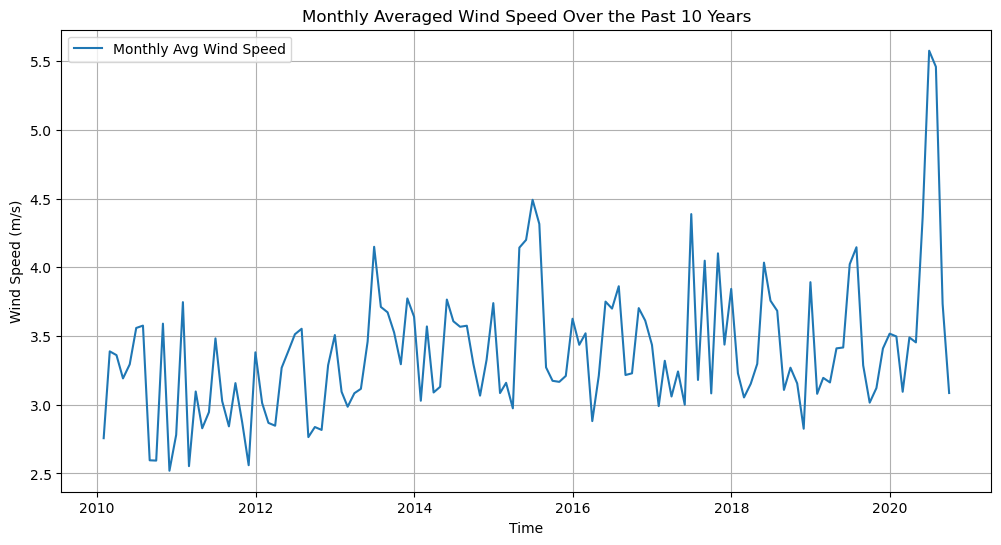

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_wind_speed.index, monthly_avg_wind_speed/10, label='Monthly Avg Wind Speed')
plt.title('Monthly Averaged Wind Speed Over the Past 10 Years')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid()

=========================================
# 3 Free Exploration
9/15  
3.1 读取csv/xls/xlsx文件，并清理缺失/低质量数据  5/5  
3.2 画出某个变量的时间序列——图表中变量需标明变量名和单位  4/5  
3.3 对该变量进行至少5种简单的统计检验，并在报告中汇报你的发现  0/5


In [14]:
###第三题
data=pd.read_csv('PS_2_data.csv')
data


,Time,Site,WS,WD,T,RH,P,Precip
0,2020/1/1 0:00,G3674,3.1,91,15.9,92,1008.1,0.0
1,2020/1/1 1:00,G3674,2.9,108,15.7,91,1008.1,0.0
2,2020/1/1 2:00,G3674,2.8,106,15.5,92,1007.8,0.0
3,2020/1/1 3:00,G3674,3.9,98,15.3,92,1007.5,0.0
4,2020/1/1 4:00,G3674,4.6,79,15.2,91,1007.4,0.0
...,...,...,...,...,...,...,...,...
8763,2020/12/31 19:00,G3674,2.5,340,9.4,30,-999.0,0.0
8764,2020/12/31 20:00,G3674,2.4,338,9.7,30,-999.0,0.0
8765,2020/12/31 21:00,G3674,2.7,349,9.8,33,-999.0,0.0
8766,2020/12/31 22:00,G3674,5.4,348,9.8,35,-999.0,0.0


In [15]:
data['Datetime'] = pd.to_datetime(data['Time'])
data['Datetime']
data = data[data['T'] != -999]
data.set_index('Datetime', inplace=True)
data=data['T'].resample('M').mean()
data

Datetime
2020-01-31    16.710753
2020-02-29    16.781034
2020-03-31    19.449866
2020-04-30    20.251111
2020-05-31    25.591667
2020-06-30    27.531389
2020-07-31    28.340860
2020-08-31    27.604570
2020-09-30    27.205833
2020-10-31    23.814621
2020-11-30    21.754861
2020-12-31    16.470565
Freq: M, Name: T, dtype: float64

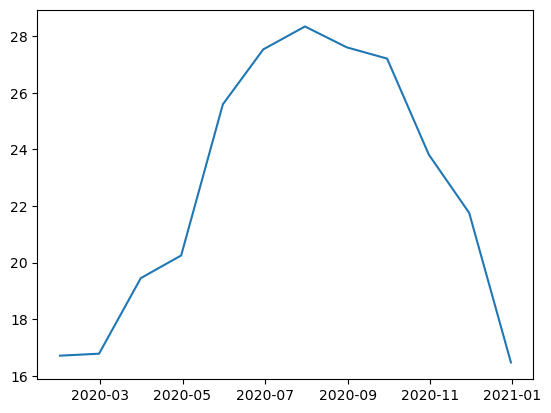

In [16]:
plt.plot(data.index, data, label='Monthly Avg T')